In [1]:
# ✅ Working version for Kaggle
import os
import pandas as pd

# Define candidate filename patterns for each dataset
candidates = {
    "clinical_notes": ["cleaned_stitched_notes", "stitched_notes"],
    "neuroicu_death": ["death.csv", "death"],
    "radiology_notes": ["clean_radiology_notes_tagged", "clean_radiology"]
}

base = "/kaggle/input"
found = {}

# Search for files under /kaggle/input that match the patterns
for key, patterns in candidates.items():
    found[key] = []
    for root, _, files in os.walk(base):
        for f in files:
            lf = f.lower()
            for p in patterns:
                if p.lower() in lf:
                    found[key].append(os.path.join(root, f))

# Load and preview first 5 records of each dataset
for key, paths in found.items():
    if not paths:
        print(f"[MISSING] {key} - no matching CSV under {base}")
    else:
        path = paths[0]
        print(f"\n[FOUND] {key}: {path}")
        df = pd.read_csv(path, low_memory=False)
        print(f"Shape: {df.shape}")
        print(df.head(5))



[FOUND] clinical_notes: /kaggle/input/clinical-notes-cleaned/cleaned_stitched_notes (2).csv
Shape: (3764, 18)
          note_id  subject_id   hadm_id note_type  \
0  10002348-DS-13    10002348  22725460        DS   
1   10004113-DS-2    10004113  29879900        DS   
2  10013310-DS-17    10013310  22098926        DS   
3  10017308-DS-14    10017308  29888008        DS   
4  10017308-DS-15    10017308  20048401        DS   

                                                text            charttime  \
0   \nName:  ___                   Unit No:   ___...  2112-12-10 00:00:00   
1   \nName:  ___                       Unit No:  ...  2173-03-22 00:00:00   
2   \nName:  ___     Unit No:   ___\n \nAdmission...  2153-07-21 00:00:00   
3   \nName:  ___                  Unit No:   ___\...  2142-08-16 00:00:00   
4   \nName:  ___                  Unit No:   ___\...  2143-03-10 00:00:00   

             storetime        tag  \
0  2112-12-10 16:52:00  DISCHARGE   
1  2173-03-22 16:49:00  DISCHARGE

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [2]:
!pip install transformers torch tqdm --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 26.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [3]:
import torch
from transformers import AutoTokenizer, AutoModel
import pandas as pd
from tqdm import tqdm

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [4]:
# Paths (from your environment)
path_clinical = "/kaggle/input/clinical-notes-cleaned/cleaned_stitched_notes (2).csv"
path_radiology = "/kaggle/input/radiology-notes-cleaned/clean_radiology_notes_tagged (1).csv"
path_death = "/kaggle/input/neuroicu/death.csv"

# Load
clinical_df = pd.read_csv(path_clinical)
radiology_df = pd.read_csv(path_radiology)
death_df = pd.read_csv(path_death)

print("Clinical Notes:", clinical_df.shape)
print("Radiology Notes:", radiology_df.shape)
print("Death Data:", death_df.shape)


Clinical Notes: (3764, 18)
Radiology Notes: (65030, 17)
Death Data: (364627, 7)


In [5]:
%whos


Variable         Type         Data/Info
---------------------------------------
AutoModel        type         <class 'transformers.mode<...>modeling_auto.AutoModel'>
AutoTokenizer    type         <class 'transformers.mode<...>tion_auto.AutoTokenizer'>
base             str          /kaggle/input
candidates       dict         n=3
clinical_df      DataFrame                 note_id  sub<...>n[3764 rows x 18 columns]
death_df         DataFrame            subject_id gender<...>[364627 rows x 7 columns]
device           device       cuda
df               DataFrame                  note_id  su<...>[65030 rows x 17 columns]
f                str          clean_radiology_notes_tagged (1).csv
files            list         n=1
found            dict         n=3
key              str          radiology_notes
lf               str          clean_radiology_notes_tagged (1).csv
os               module       <module 'os' (frozen)>
p                str          clean_radiology
path             str          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [6]:
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# 1️⃣ Load pretrained Bio+ClinicalBERT model & tokenizer
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 2️⃣ Move model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# 3️⃣ Define embedding function
def generate_embeddings(df, text_column, batch_size=8):
    """Generate mean pooled BERT embeddings for each note."""
    all_embeddings = []
    for i in tqdm(range(0, len(df), batch_size)):
        batch_texts = df[text_column].iloc[i:i+batch_size].tolist()
        enc = tokenizer(batch_texts, padding=True, truncation=True,
                        max_length=256, return_tensors="pt").to(device)
        with torch.no_grad():
            out = model(**enc)
            emb = out.last_hidden_state.mean(dim=1).cpu()  # mean pooling
        all_embeddings.append(emb)
    return torch.cat(all_embeddings)

# 4️⃣ Generate embeddings
clinical_emb = generate_embeddings(clinical_df, "clean_text")
radiology_emb = generate_embeddings(radiology_df, "clean_text")

# 5️⃣ Save them
torch.save(clinical_emb, "clinical_embeddings.pt")
torch.save(radiology_emb, "radiology_embeddings.pt")

print("✅ Saved: clinical_embeddings.pt and radiology_embeddings.pt")


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]


100%|██████████| 8129/8129 [17:38<00:00,  7.68it/s]


✅ Saved: clinical_embeddings.pt and radiology_embeddings.pt


In [7]:
import torch
import pandas as pd

# load the embeddings you already saved
clinical_emb = torch.load("clinical_embeddings.pt")
radiology_emb = torch.load("radiology_embeddings.pt")

# turn them into pandas DataFrames
clinical_emb_df = pd.DataFrame(clinical_emb.numpy())
radiology_emb_df = pd.DataFrame(radiology_emb.numpy())

# attach the patient / subject IDs from your original DataFrames
clinical_emb_df.insert(0, "subject_id", clinical_df["subject_id"].values)
radiology_emb_df.insert(0, "subject_id", radiology_df["subject_id"].values)

# save as CSVs
clinical_emb_df.to_csv("clinical_embeddings.csv", index=False)
radiology_emb_df.to_csv("radiology_embeddings.csv", index=False)

print("✅ Saved: clinical_embeddings.csv and radiology_embeddings.csv")


✅ Saved: clinical_embeddings.csv and radiology_embeddings.csv


In [8]:
import torch

clinical_embeddings = torch.load("clinical_embeddings.pt")
radiology_embeddings = torch.load("radiology_embeddings.pt")

print(clinical_embeddings.shape)
print(radiology_embeddings.shape)


torch.Size([3764, 768])
torch.Size([65030, 768])


In [9]:
print(torch.isnan(clinical_emb).any(), torch.isnan(radiology_emb).any())
print(clinical_emb.abs().mean(), radiology_emb.abs().mean())


tensor(False) tensor(False)
tensor(0.1812) tensor(0.1723)


In [10]:
from torch.nn.functional import cosine_similarity

i, j = 10, 20  # pick two example rows from same patient
sim = cosine_similarity(clinical_emb[i].unsqueeze(0), clinical_emb[j].unsqueeze(0))
print(f"Cosine similarity: {sim.item():.4f}")


Cosine similarity: 0.9794


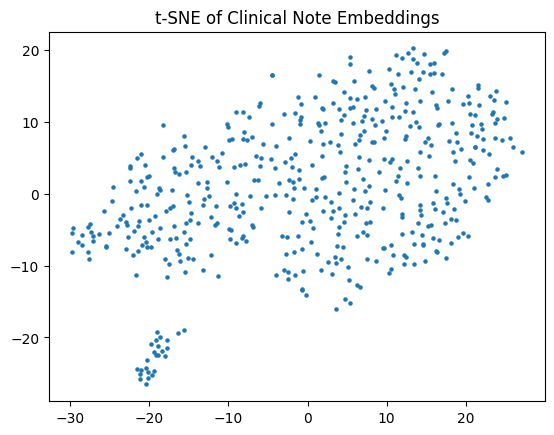

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = clinical_emb[:500].cpu().numpy()  # take small subset
X_2d = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_2d[:,0], X_2d[:,1], s=5)
plt.title("t-SNE of Clinical Note Embeddings")
plt.show()
